# Avocado_project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [2]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df=pd.read_csv('avocado.csv')

In [4]:
df

No        Date  AveragePrice  Total Volume     4046       4225    4770  \
0       0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1       1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2       2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3       3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4       4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...    ..         ...           ...           ...      ...        ...     ...   
18244   7  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245   8  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246   9  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  10  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  11  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 14 columns]

In [5]:
df.drop('No',axis=1,inplace=True)

In [6]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [7]:
df.shape

(18249, 13)

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  

let's do some Feature Engineering on the Date Feature so that we can be able to use the day and the month columns in building our machine learning model later.

In [10]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

I didn't do for the year because its already there in the dataframe.

In [11]:
#Now we can drop the column'Date' as there are 'Day','Month' and 'year' columns present separately.
df.drop('Date',axis=1,inplace=True)

In [12]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [13]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int32
day               int32
dtype: object

In [14]:
# checking the null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
day             0
dtype: int64

In [15]:
# checking the duplicate values
df.duplicated().sum()

0

In [16]:
#checking the unique values in region,type column
df["region"].unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [18]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [19]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

no. of unique values
AveragePrice                   259
Total Volume                 18237
4046                         17702
4225                         18103
4770                         12071
Total Bags                   18097
Small Bags                   17321
Large Bags                   15082
XLarge Bags                   5588
type                             2
year                             4
region                          54
Month                           12
day                             31

# Data Visualization

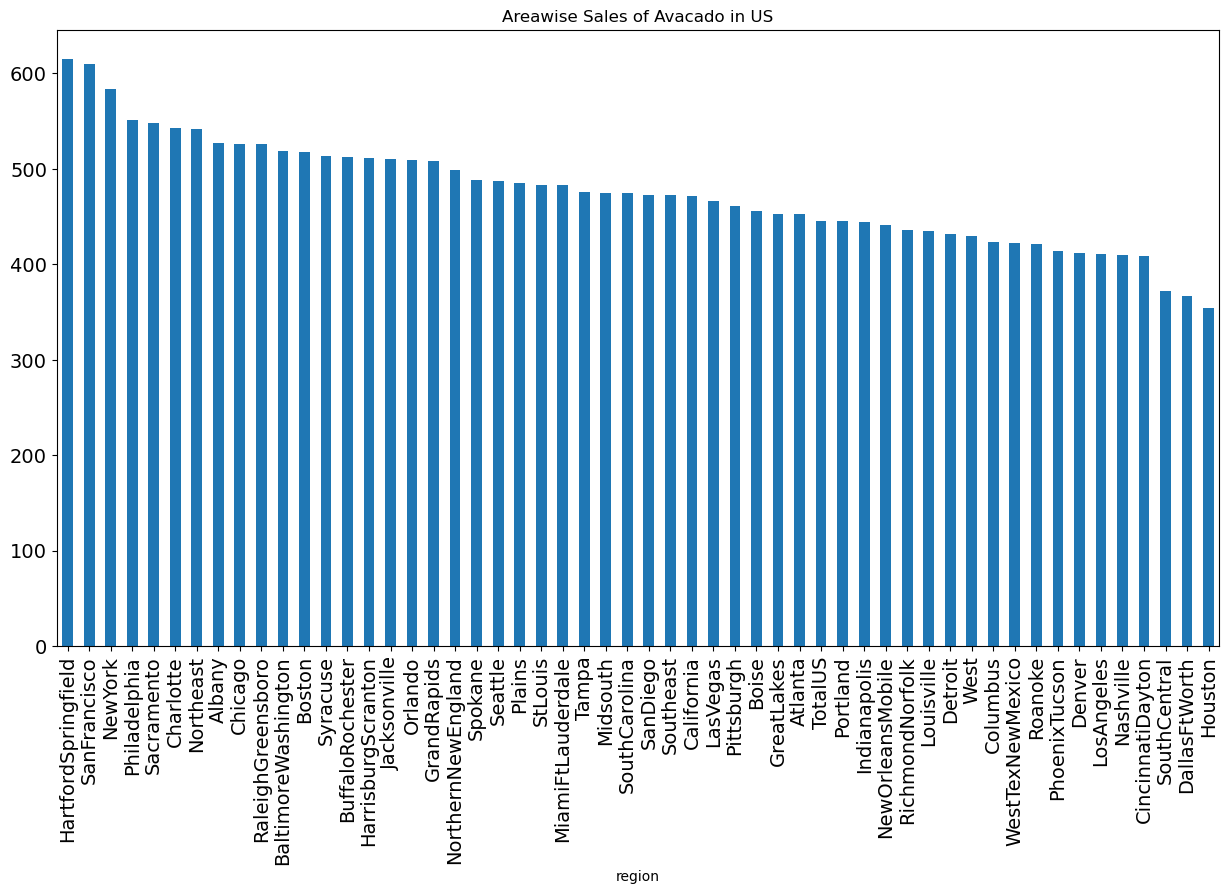

In [20]:
df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),title='Areawise Sales of Avacado in US',fontsize=14);

Here we can see that the sales of Avacado in differen cities of US. Houston city has least demand and Hartfordsprigfield has high demand for Avacado.

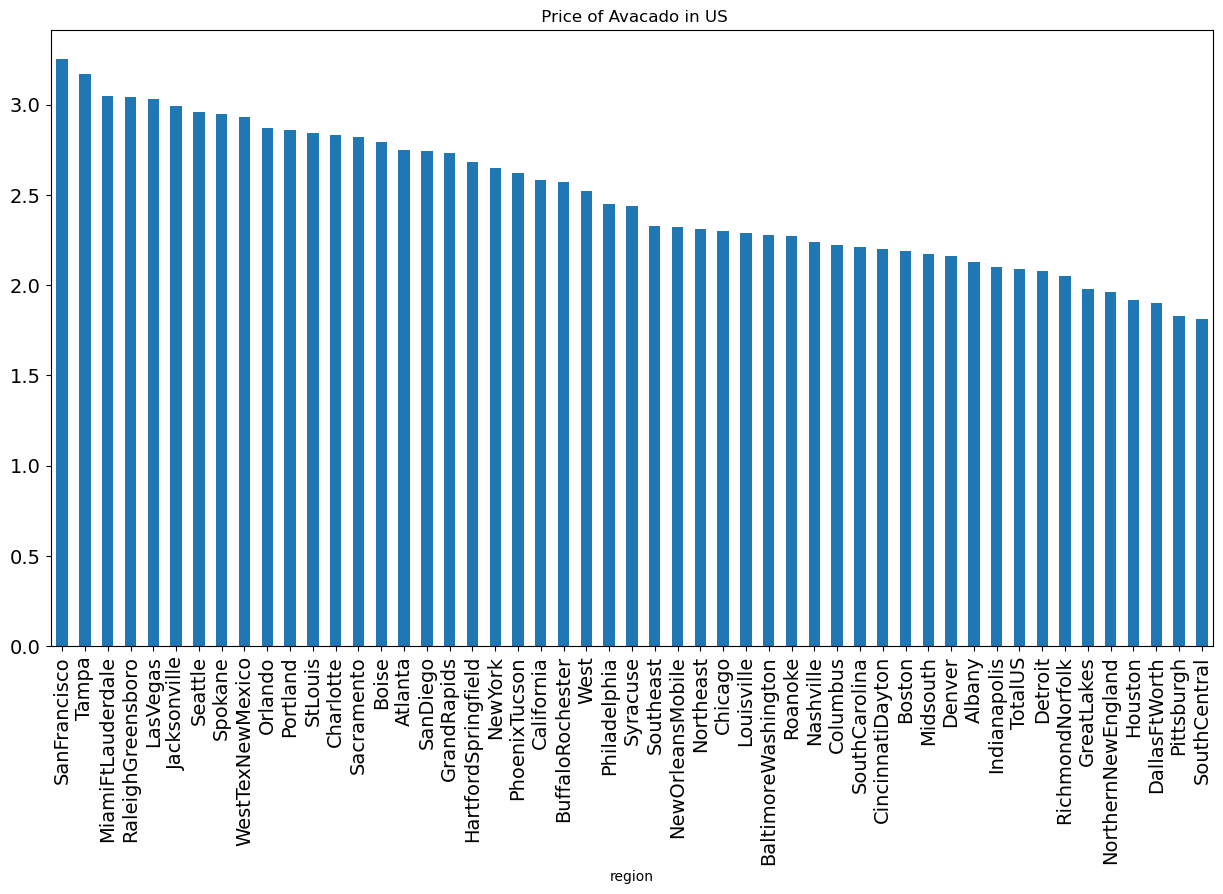

In [21]:
df.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(15,8),title=' Price of Avacado in US',fontsize=14);


We can see that sanFrancisco has highest price of Avocado and SouthCentral has the lowe

# Data Visualization

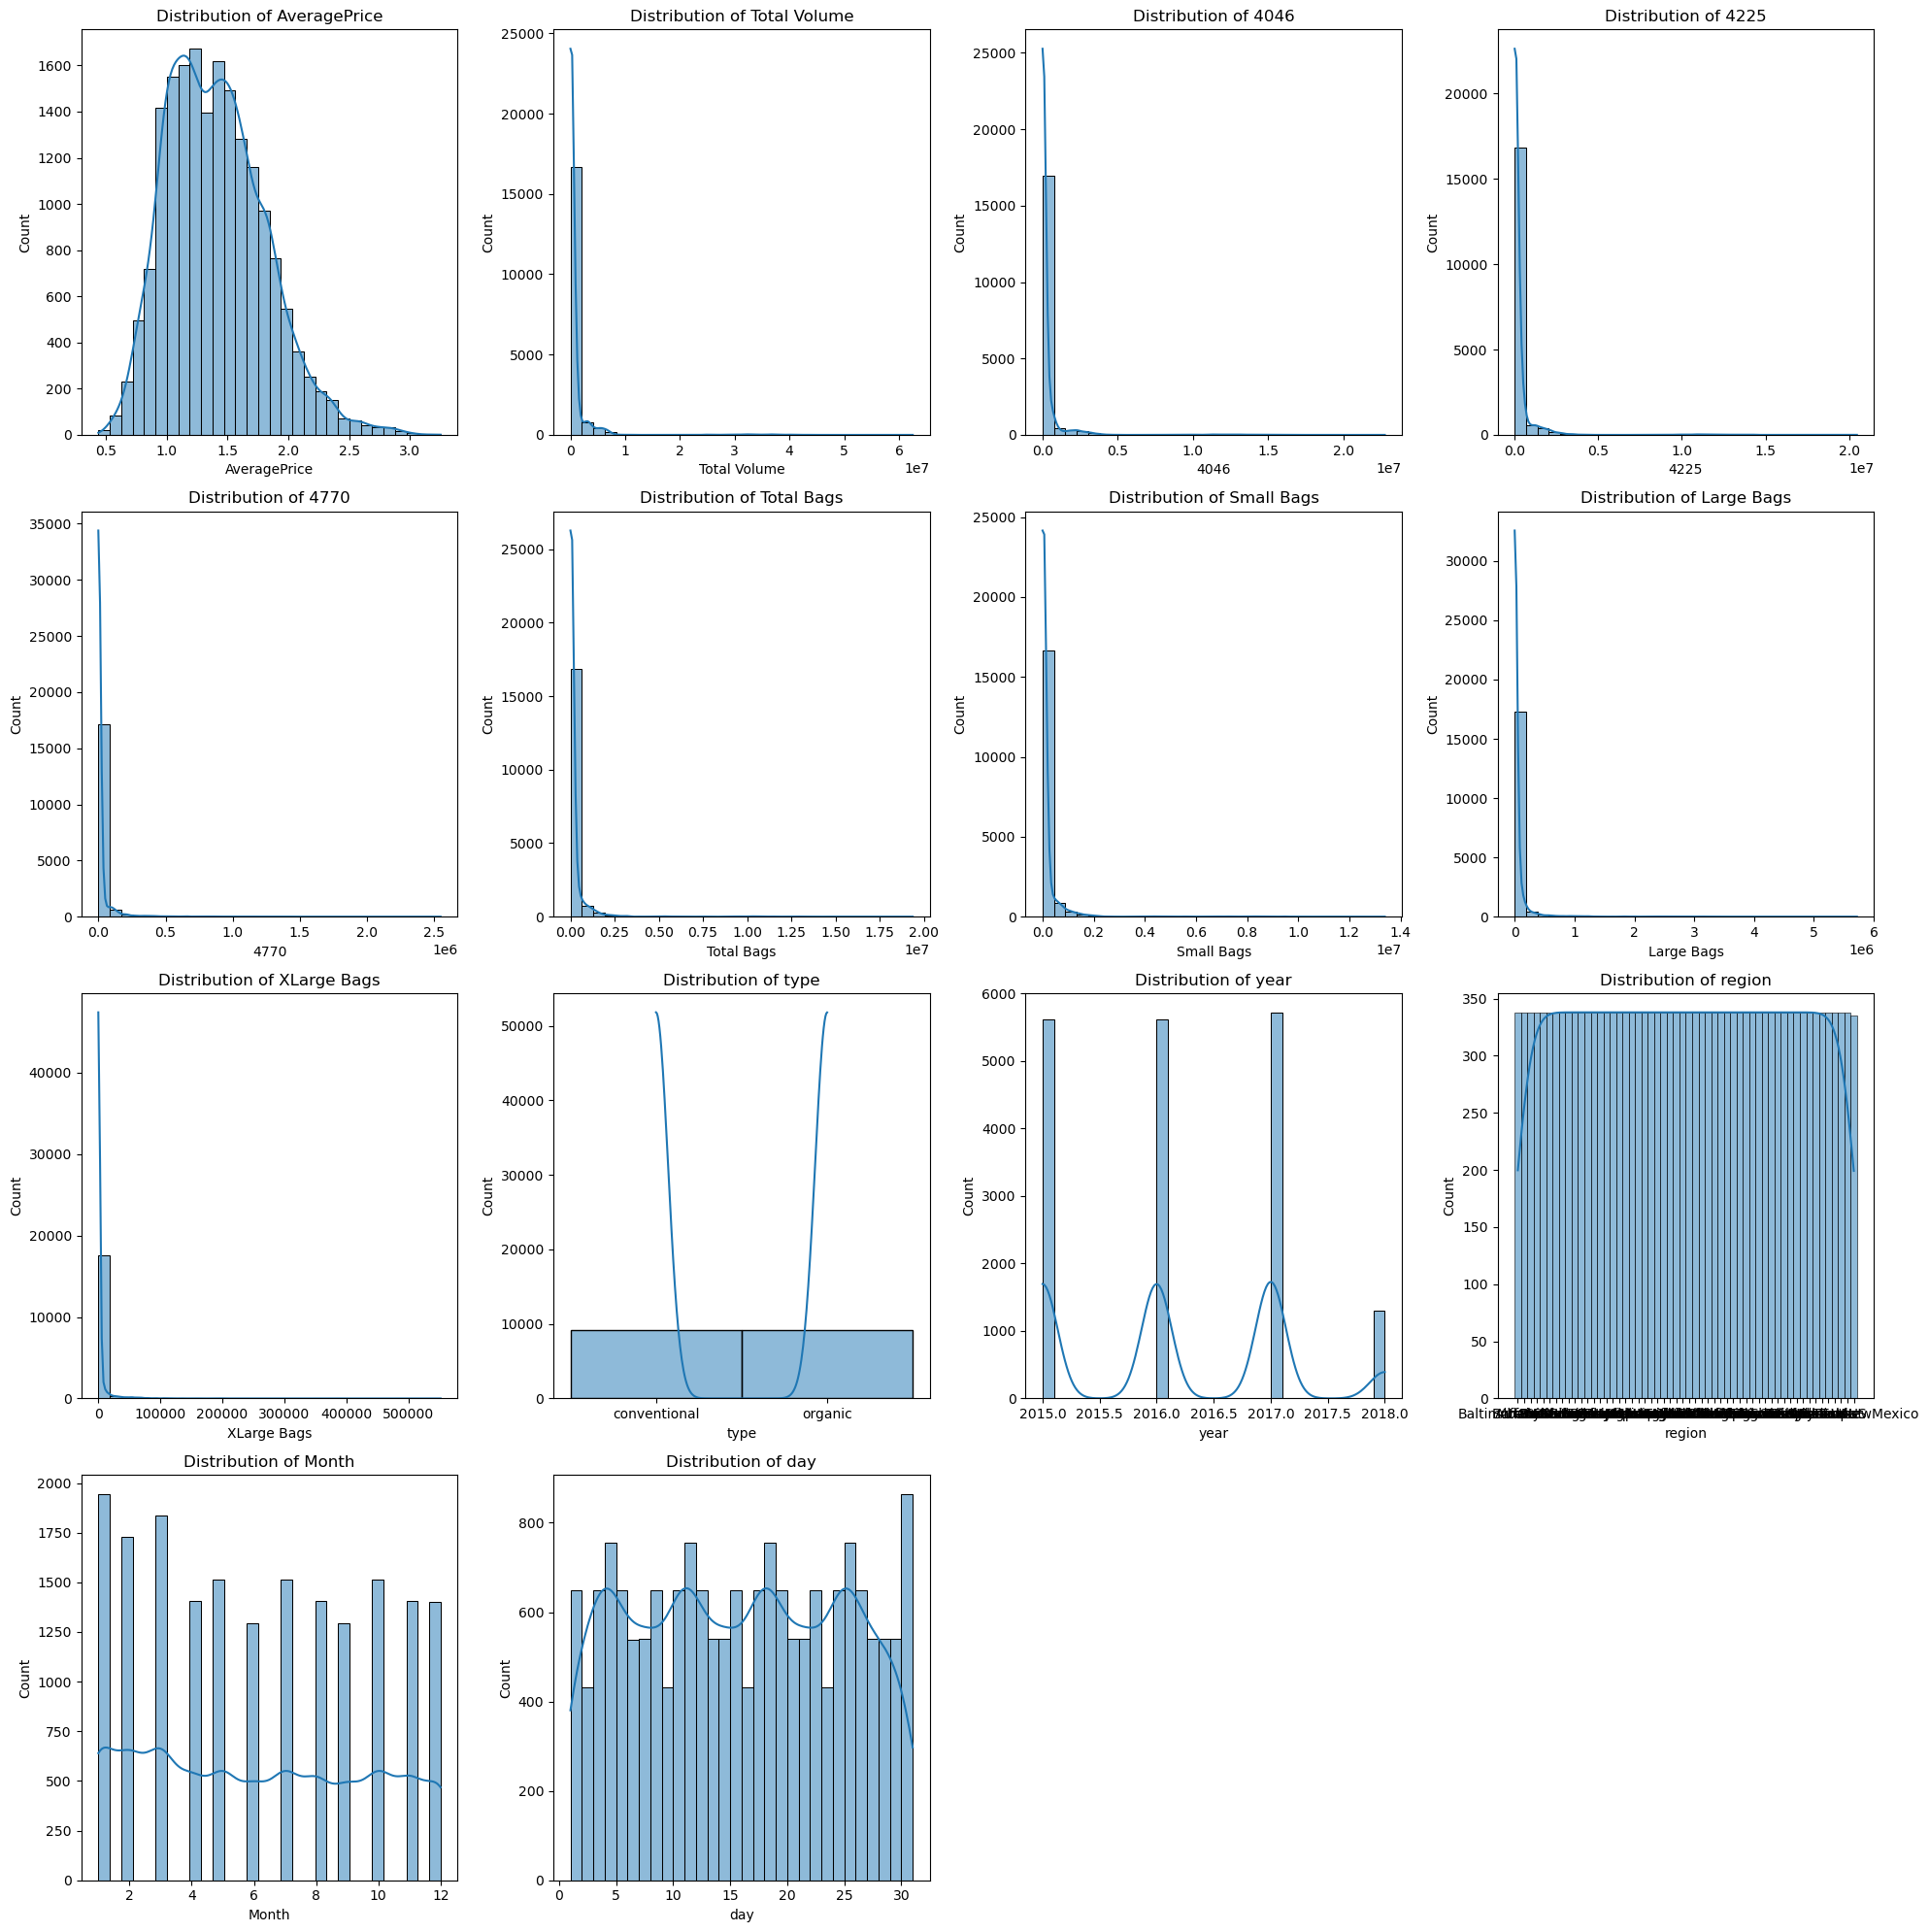

In [22]:
#checking  whether the graph is right skewed, left skewed or the graph is normally distributed graph
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Mostly columns are left skewed.
1. column AveragePrice is normally distributed in histogram. 
2. Region is showing the tub shaped curved graph . It means data is uniformly distributed in certain range.

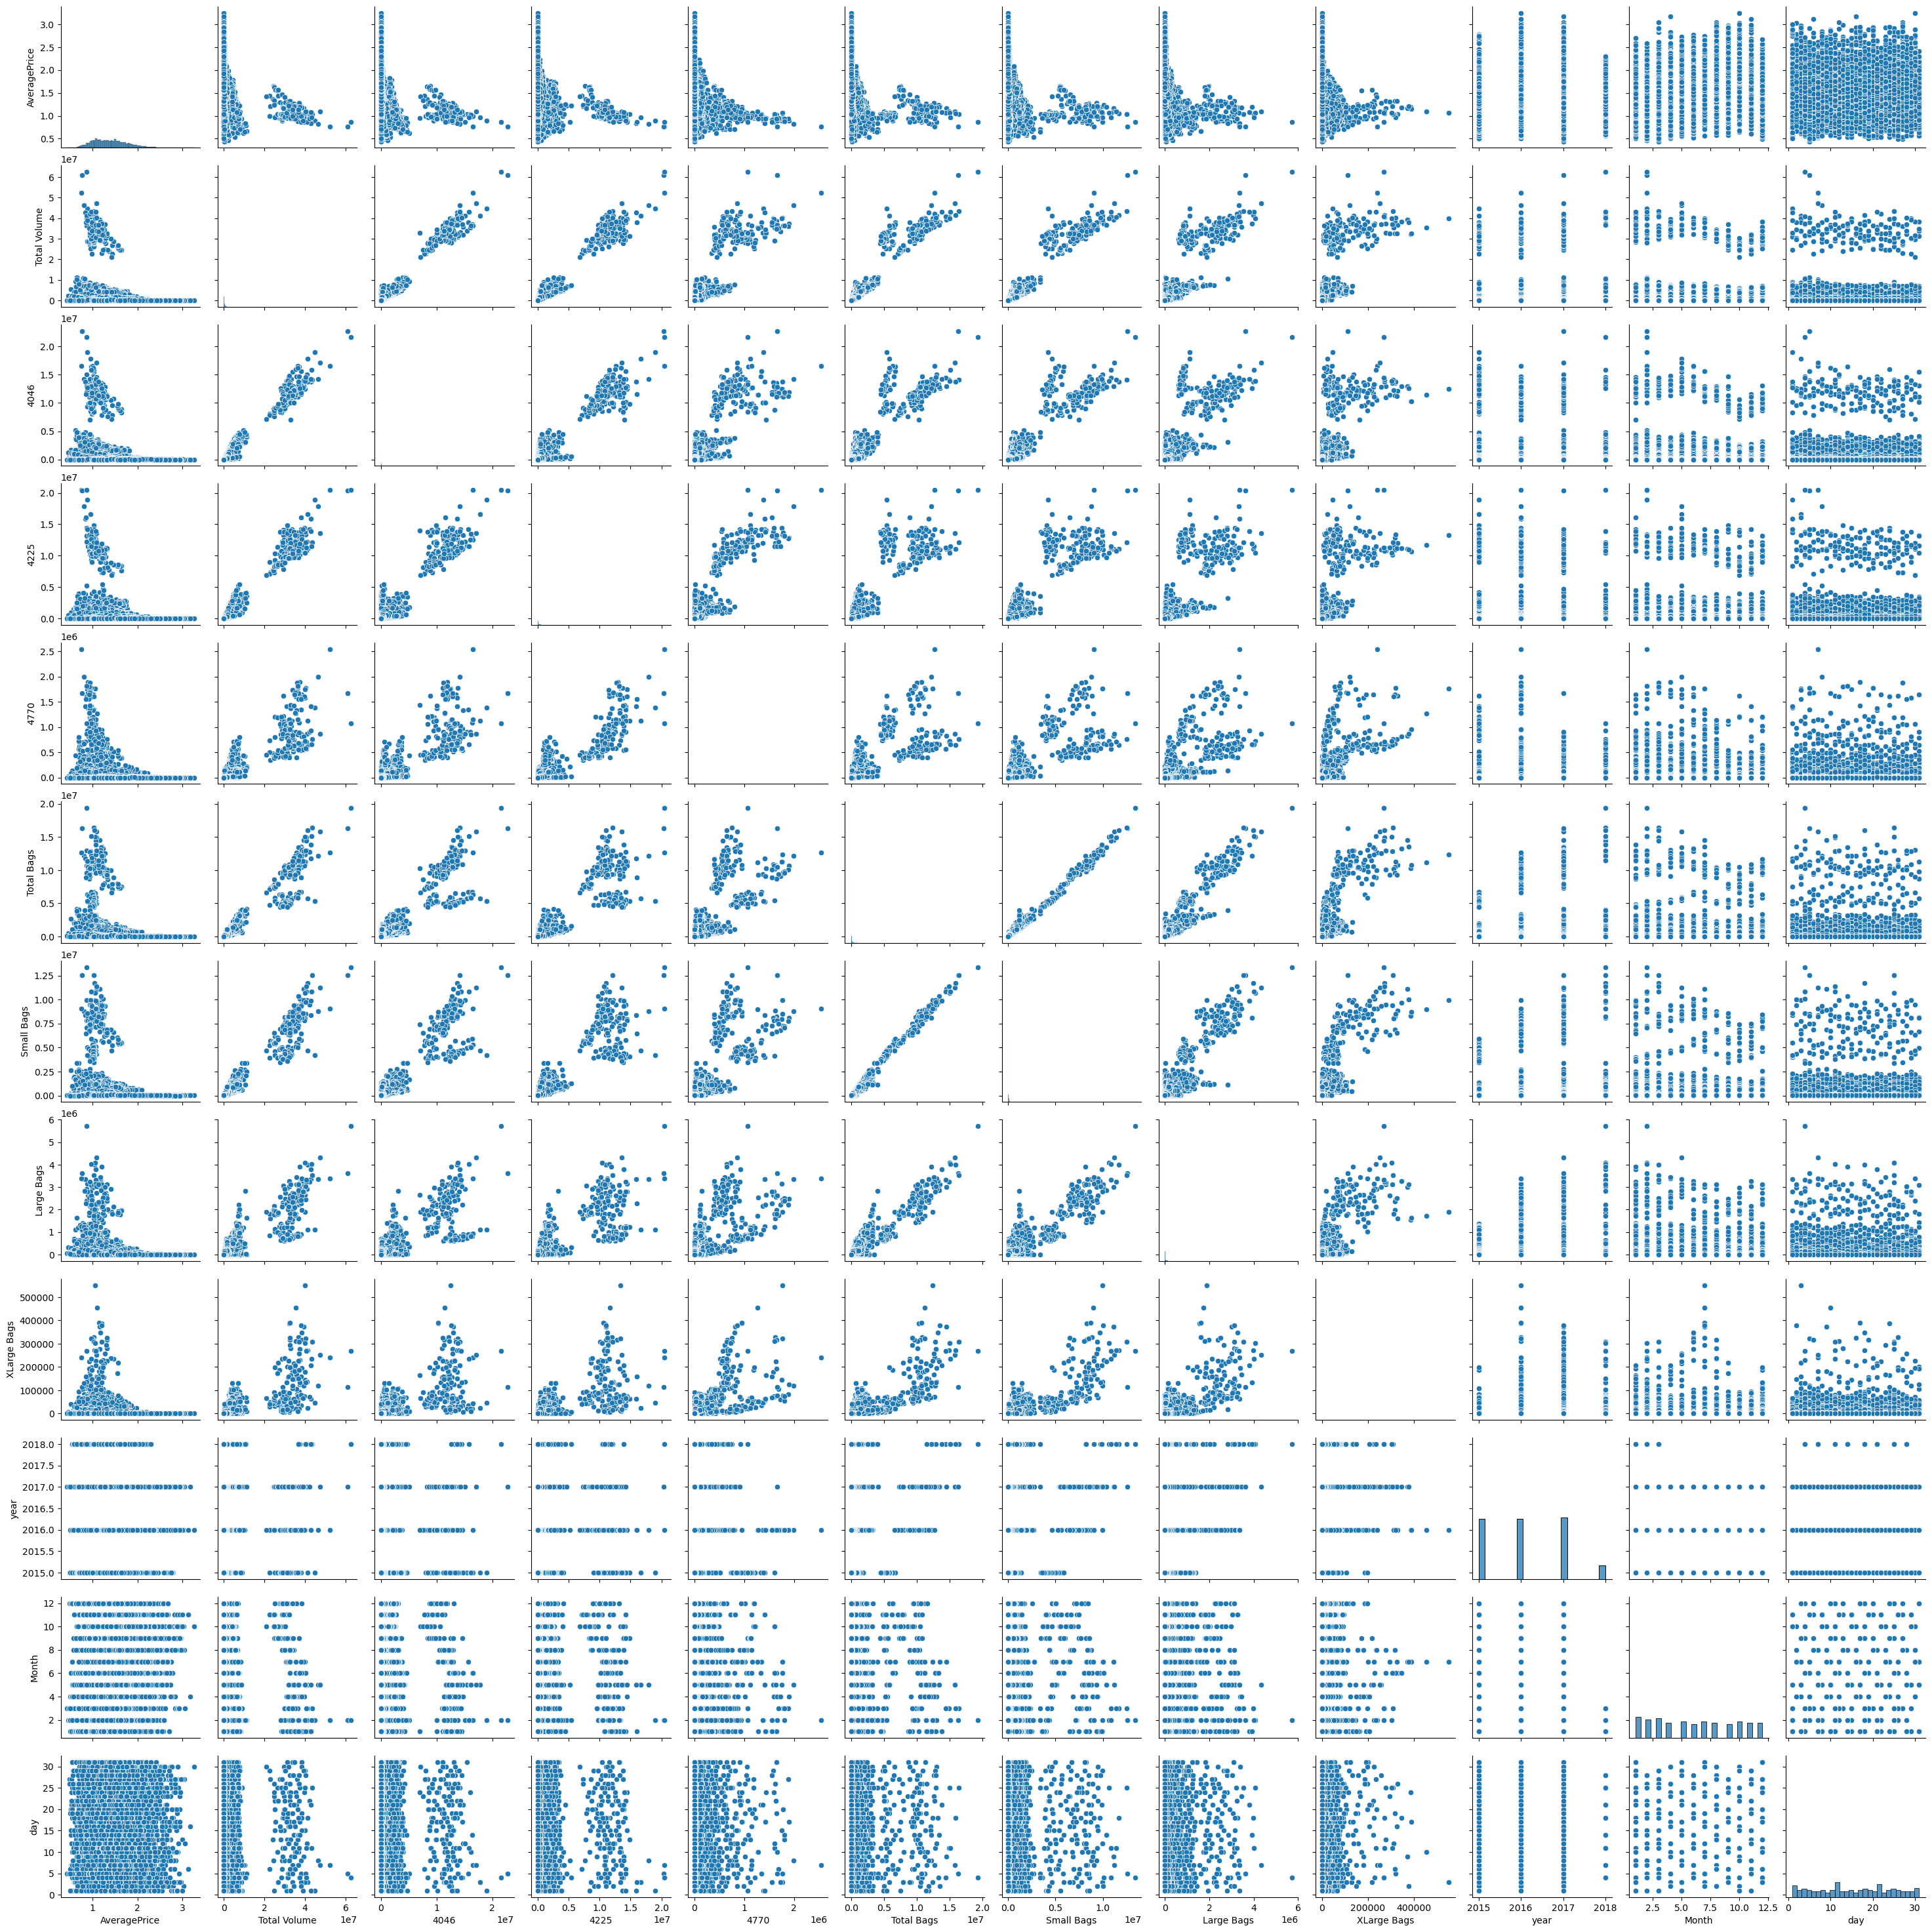

In [23]:
sns.pairplot(df)

<Axes: xlabel='year', ylabel='AveragePrice'>

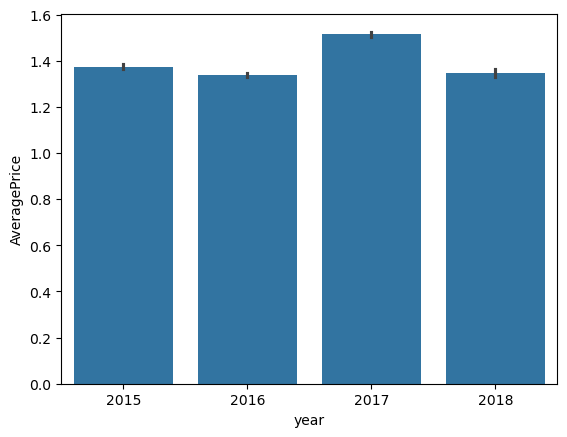

In [24]:
#for checking ratio of year and Price that which year has maximum average price
sns.barplot(x='year',y='AveragePrice',data=df)


<Axes: xlabel='Month', ylabel='AveragePrice'>

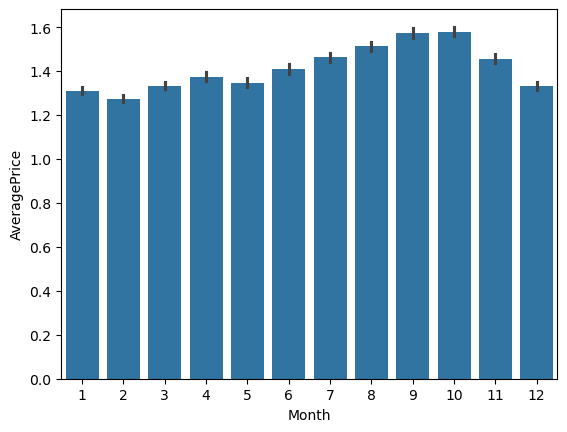

In [25]:
#Checking ratio of month and price that which year has maximum average price
sns.barplot(x='Month',y='AveragePrice',data=df)

Observations:- 1. In 2017, averageprice is maximum other than years.
    2. In october(10) and september(11) months, AveragePrice is maximum.

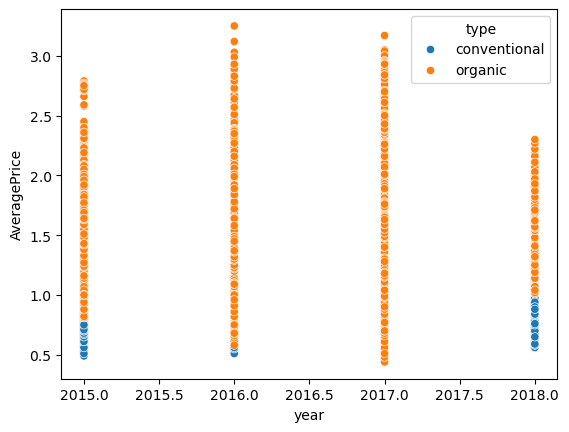

In [26]:
sns.scatterplot(x='year', y='AveragePrice', hue='type', data=df)
plt.show()

every year (2015-2018), average price of organic type avocado is more rather than conventional type.

In [27]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

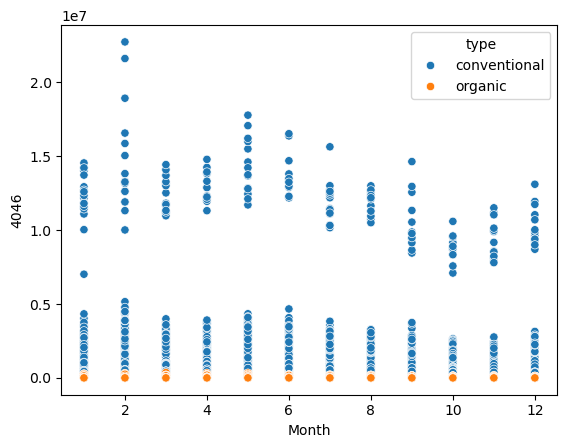

In [28]:
sns.scatterplot(y='4046', x='Month', hue='type', data=df)
plt.show()

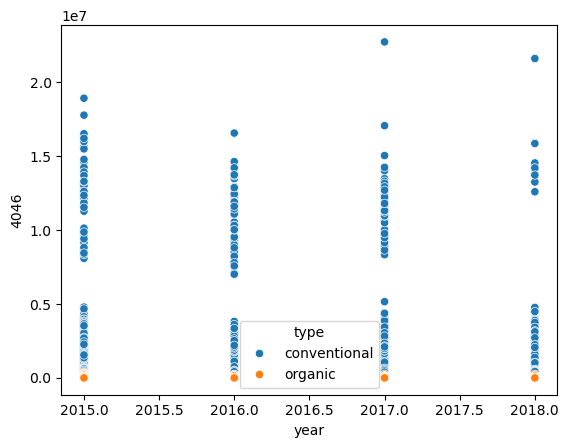

In [29]:
sns.scatterplot(y='4046', x='year', hue='type', data=df)
plt.show()

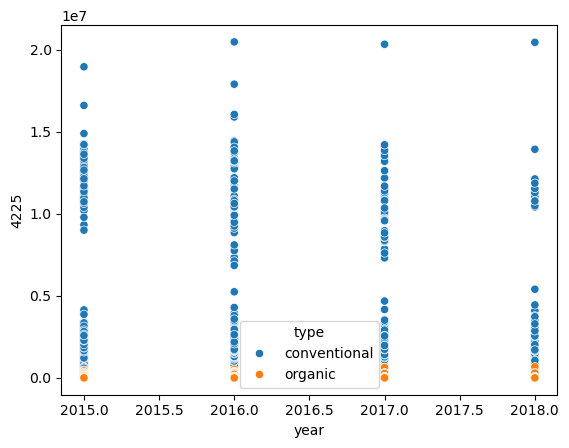

In [30]:
sns.scatterplot(y='4225', x='year', hue='type', data=df)
plt.show()

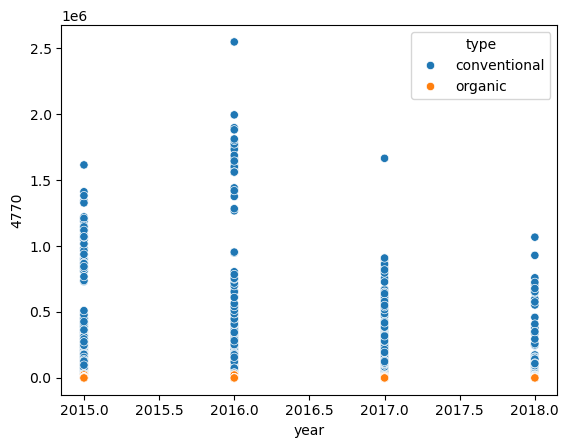

In [31]:
sns.scatterplot(y='4770', x='year', hue='type', data=df)
plt.show()

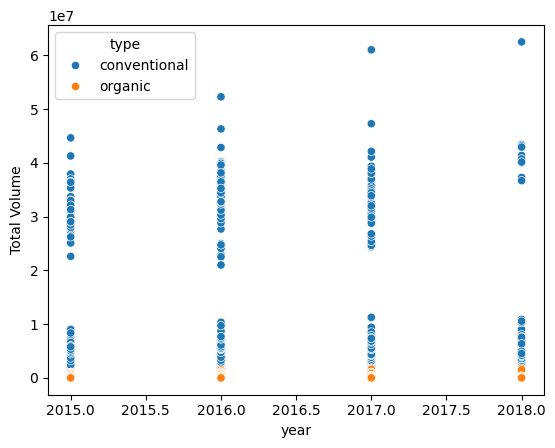

In [32]:
sns.scatterplot(y='Total Volume', x='year', hue='type', data=df)
plt.show()

conventional type avacado (4046,4225 and 4770) is more in demand throughout the year between 2015 to 2018 compared than organic.

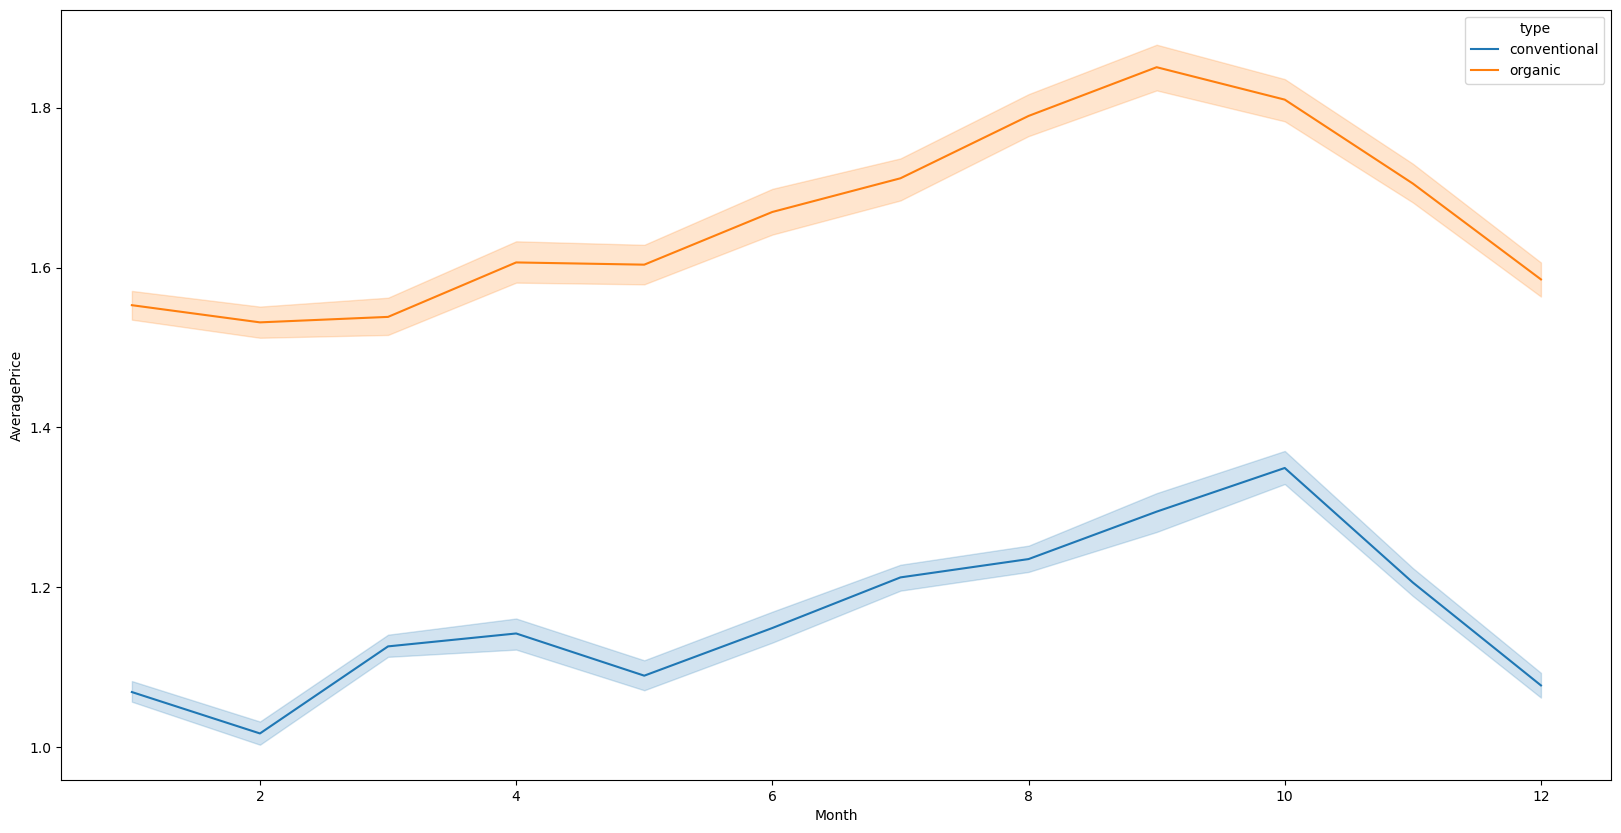

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

There is a hike in between the month 8–10 in both the types of avocado(conventional and organic).

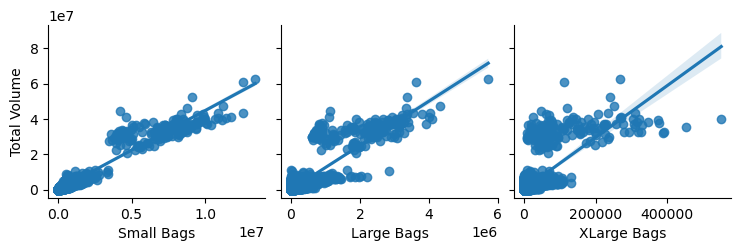

In [34]:
sns.pairplot(df,x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],y_vars='Total Volume',kind='reg')

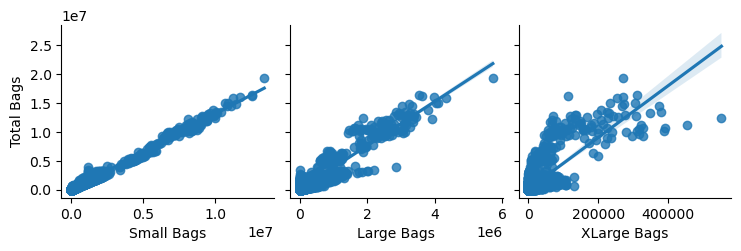

In [35]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', kind='reg')

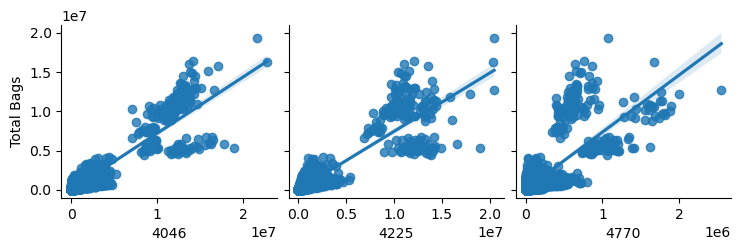

In [36]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', kind='reg')

In [37]:
# using LabelEncoder to encode the object data type for region and type column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

In [38]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [39]:
#Checking the datatypes after encoding
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
Month             int32
day               int32
dtype: object

In [40]:
df.describe() # describe the dataset- give the satistical summary 

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region         Month           day  
count  18249.000000  18249.000000  18249.000000  18249.000000  
mean    2016.147899     26.495644      6.177215     15.662612  
std        0.939938     15.583788      3.534130      8.776281  
min     2015.000000      0.000000      1.000000      1.000000  
25%     2015.000000     13.000000      3.000000      8.000000  
50%     2016.000000     26.000000      6.000000     16.000000  
75%     2017.000000     40.000000      9.000000     23.000000  
max     2018.000000     53.000000     12.000000     31.000000

Observations:
    1. Above statistics data show that there are huge gap between 75% and max, so multiple outliers are mostly present in XLargeBags.
    2. By checking the difference between the 75% and max value, there are outliers in some of the columns.
    3. Mean > Median, Positive Skewness is present.
    

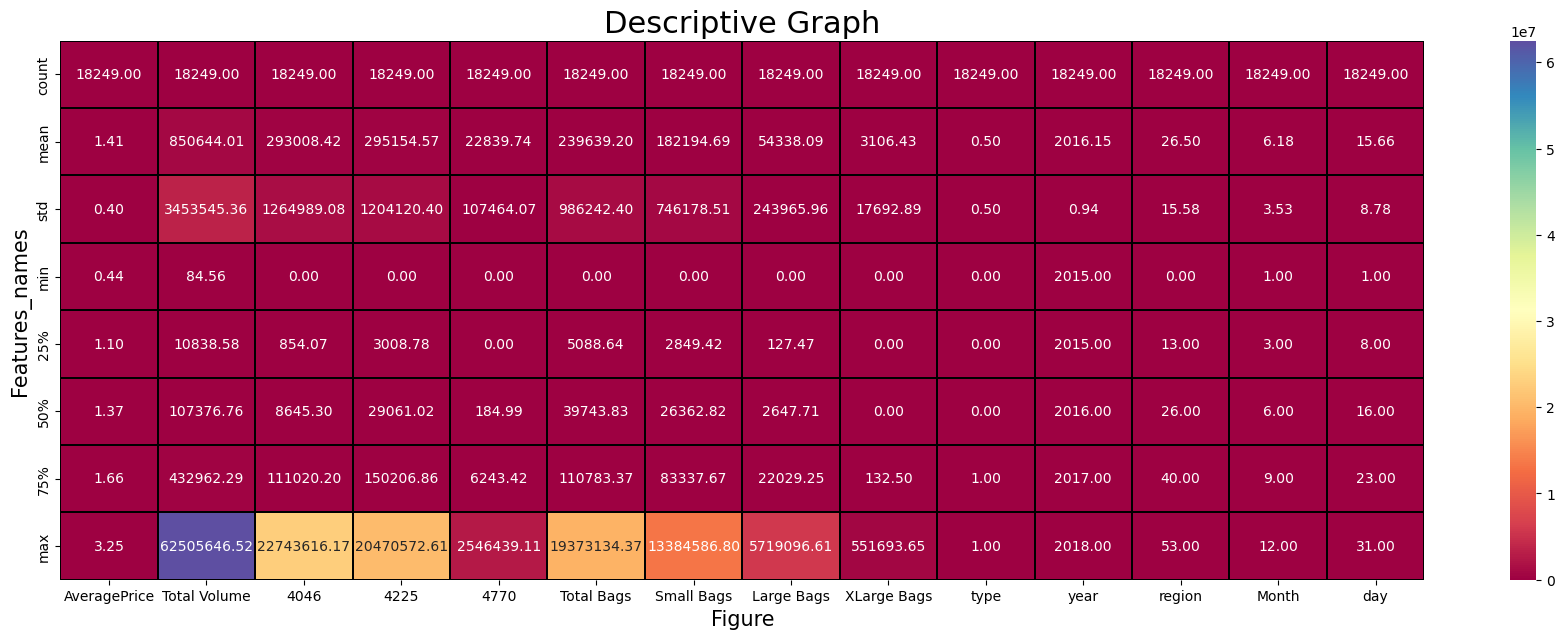

In [41]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

In [42]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
day              0.014310
dtype: float64

In [43]:
#Removing skewness
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [44]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
day             0.014310
dtype: float64

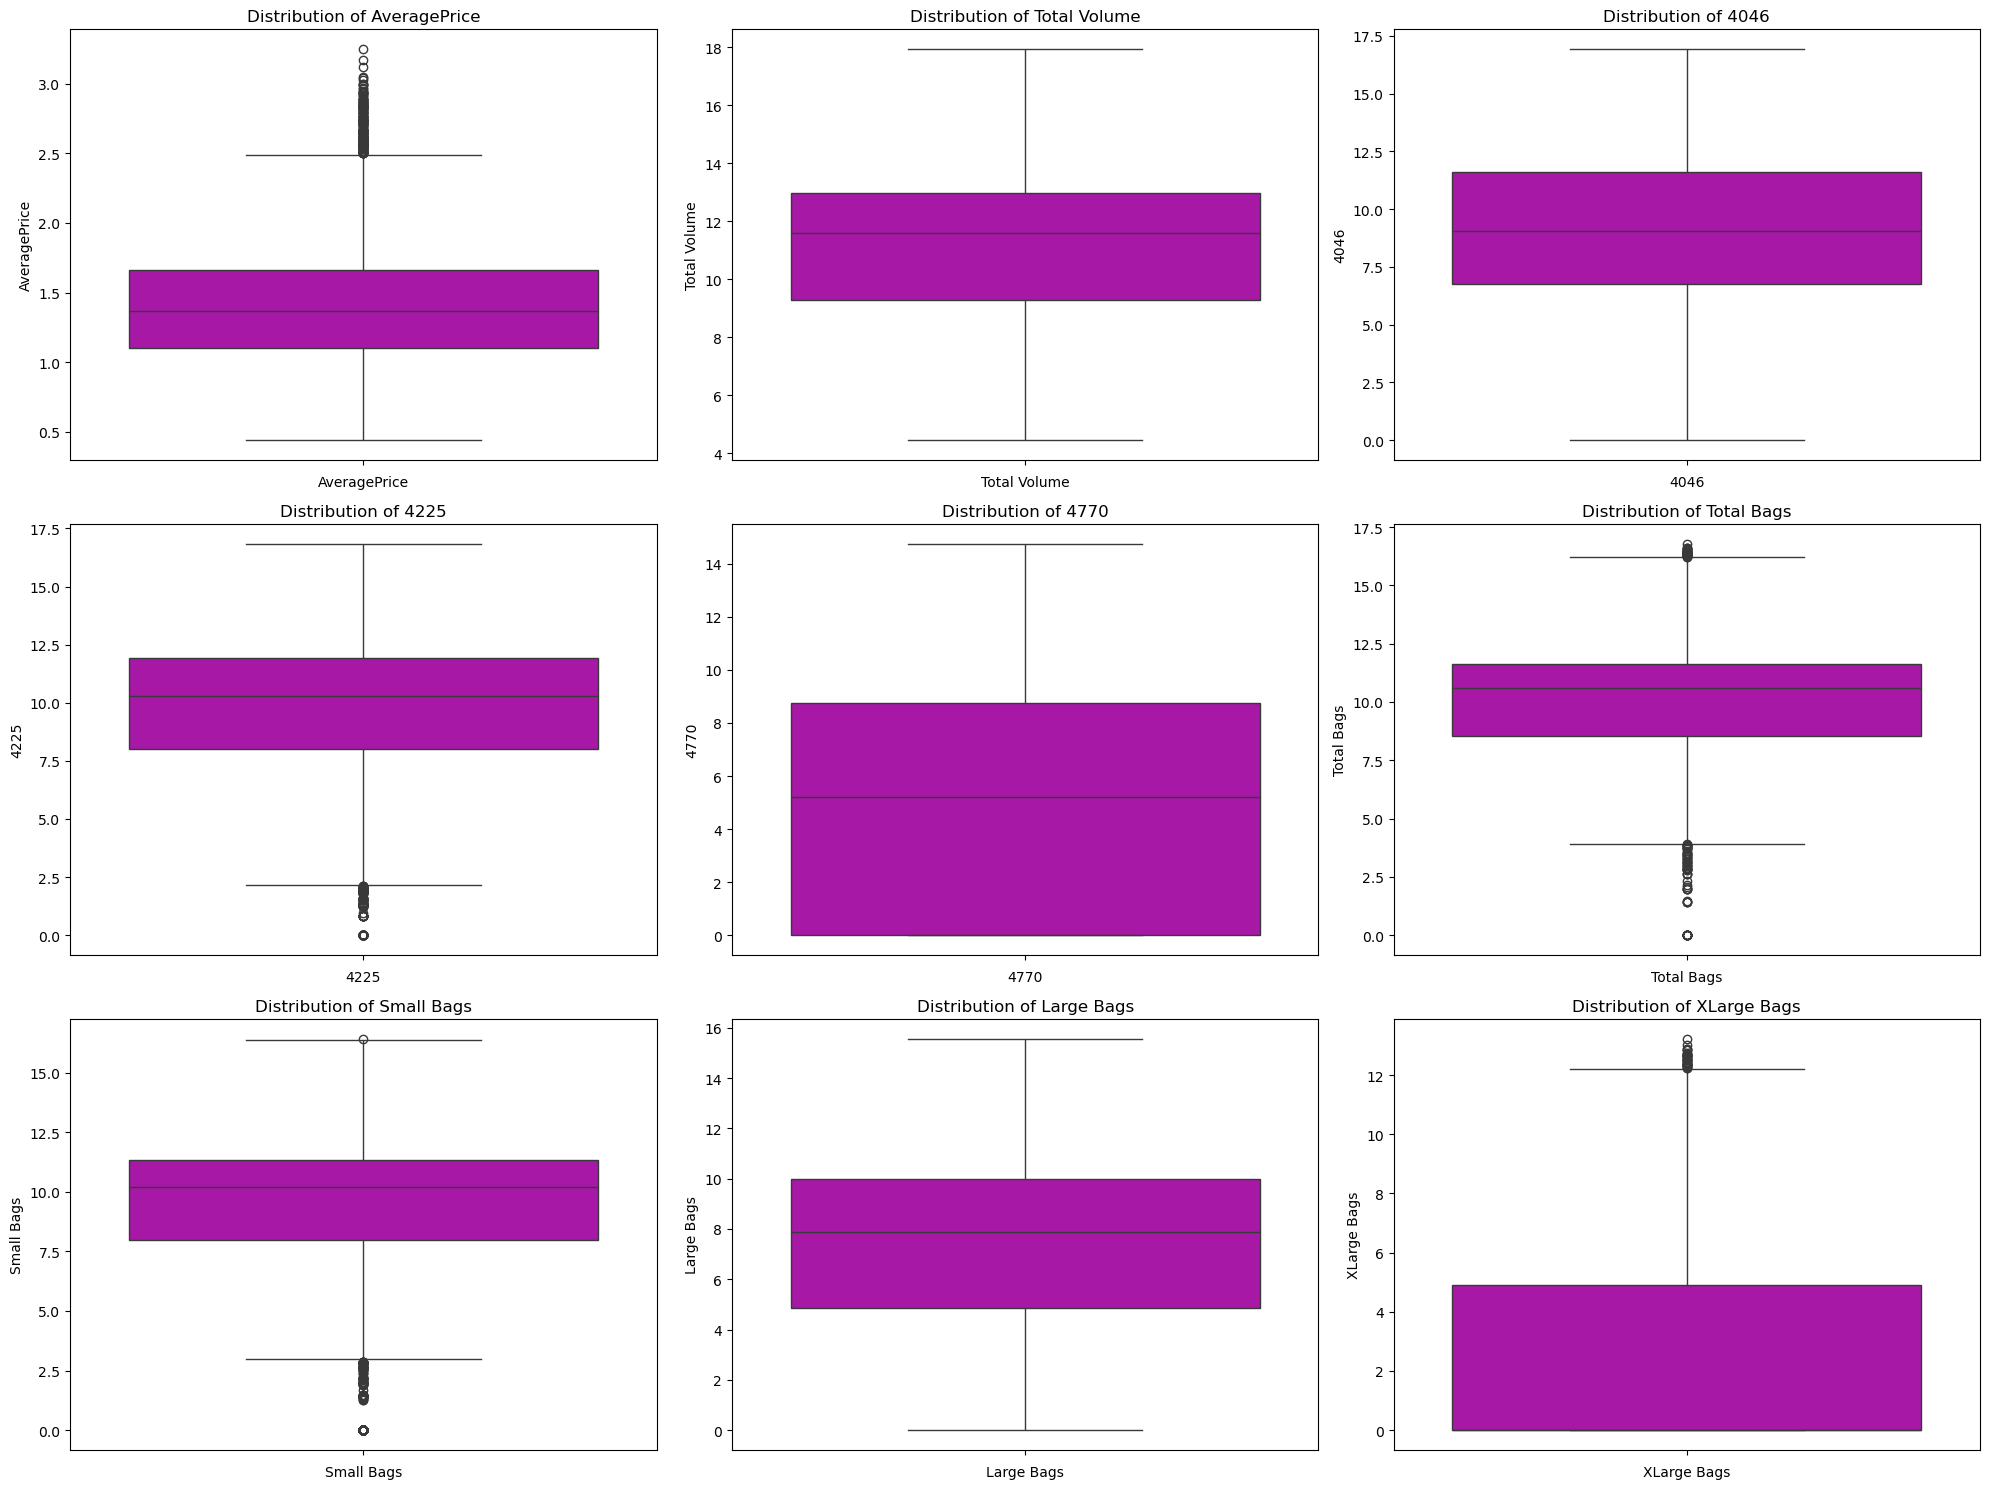

In [45]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[0:9]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

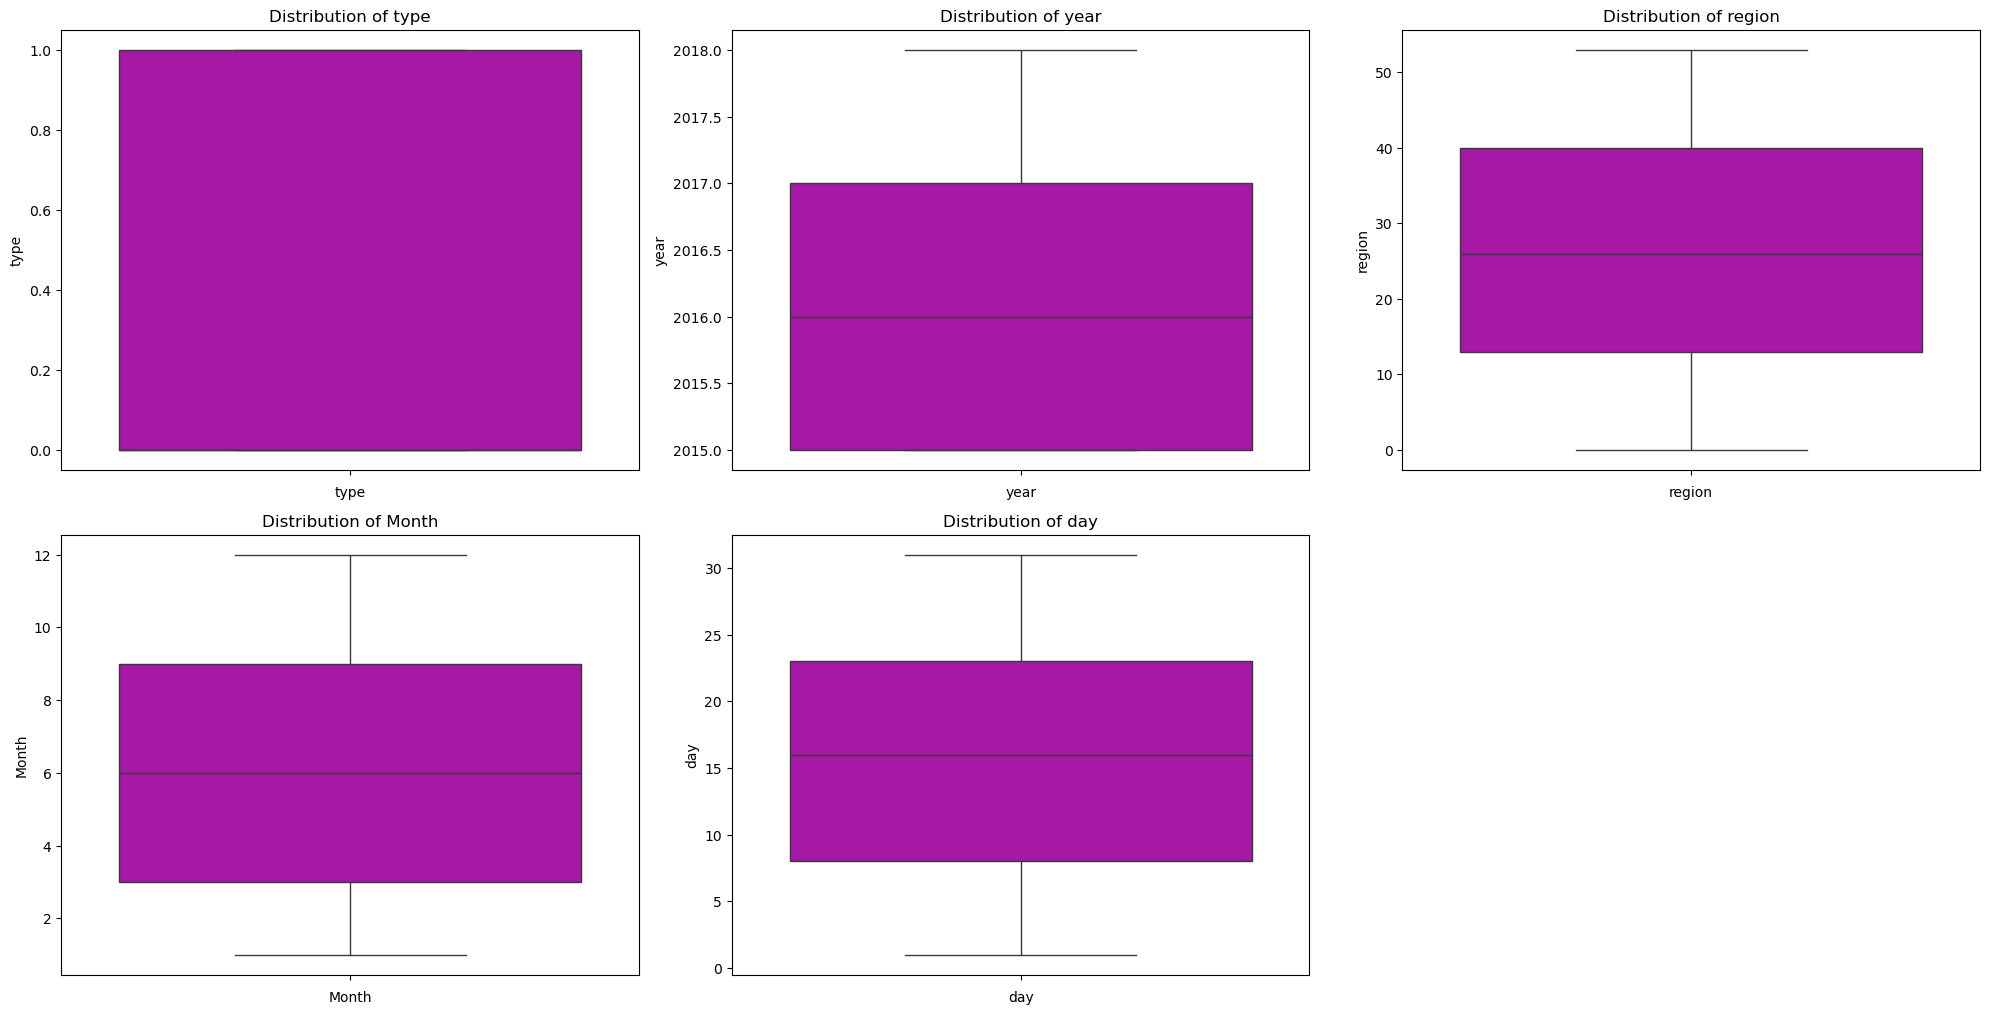

In [46]:
plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[9:15]:
    if plotnumber<=6:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Black dots are present in many columns, it means most of the data are present outside the distribution. So we have to remove the outliers by using the zscore.

In [47]:
#Removing the Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
       11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
       11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
       11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
       11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
       11336, 11337

In [48]:
df_new=df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0              1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1              1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2              0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3              1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4              1.28     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.745419  7.624599   7.333154  0.000000    9.510421   
18245          1.71      9.538855  7.083975   8.141044  0.000000    9.134090   
18246          1.87      9.530085  7.084159   7.805389  6.591591    9.147945   
18247          1.93      9.693150  7.332127   8.000363  6.590315    9.302969   
18248          1.62      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  day  
0        9.060055    4.545951          0.0     0  2015       0     12   27  
1        9.149429    4.589955          0.0     0  2015       0     12   20  
2        8.992584    4.645736          0.0     0  2015       0     12   13  
3        8.644425    4.903495          0.0     0  2015       0     12    6  
4        8.697389    5.291746          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    9.477908    6.070391          0.0     1  2018      53      2    4  
18245    9.098407    5.786284          0.0     1  2018      53      1   28  
18246    9.143431    3.768384          0.0     1  2018      53      1   21  
18247    9.298401    3.931826          0.0     1  2018      53      1   14  
18248    9.391757    3.296207          0.0     1  2018      53      1    7  

[17834 rows x 14 columns]

In [49]:
print('shape before removing the outliers:',df.shape)
print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (18249, 14)
shape after removing the outliers: (17834, 14)


In [50]:
#%data loss calculation
loss_percent=((18249-17834)/18249)*100
print(loss_percent)

2.2740972108060715


2% data loss...it is acceptable.

In [51]:
df1=df_new

In [52]:
df1.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.586934 -0.551596 -0.459261 -0.507403   
Total Volume     -0.586934      1.000000  0.886083  0.914408  0.831601   
4046             -0.551596      0.886083  1.000000  0.764740  0.746330   
4225             -0.459261      0.914408  0.764740  1.000000  0.799201   
4770             -0.507403      0.831601  0.746330  0.799201  1.000000   
Total Bags       -0.574304      0.947245  0.800158  0.812191  0.775743   
Small Bags       -0.497023      0.912346  0.780186  0.770560  0.769555   
Large Bags       -0.485341      0.672093  0.584306  0.618016  0.555664   
XLarge Bags      -0.380619      0.659128  0.583520  0.593321  0.639673   
type              0.619118     -0.793844 -0.719482 -0.741367 -0.778274   
year              0.096924      0.079282  0.007117  0.007601 -0.051923   
region           -0.030929      0.123788  0.200752  0.082283  0.082727   
Month             0.153596     -0.028577 -0.026643 -0.026360 -0.021446   
day               0.029890     -0.009460 -0.006956 -0.008487 -0.001884   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.574304   -0.497023   -0.485341    -0.380619  0.619118   
Total Volume    0.947245    0.912346    0.672093     0.659128 -0.793844   
4046            0.800158    0.780186    0.584306     0.583520 -0.719482   
4225            0.812191    0.770560    0.618016     0.593321 -0.741367   
4770            0.775743    0.769555    0.555664     0.639673 -0.778274   
Total Bags      1.000000    0.947593    0.712659     0.638414 -0.725180   
Small Bags      0.947593    1.000000    0.551449     0.621203 -0.724734   
Large Bags      0.712659    0.551449    1.000000     0.466647 -0.496650   
XLarge Bags     0.638414    0.621203    0.466647     1.000000 -0.625329   
type           -0.725180   -0.724734   -0.496650    -0.625329  1.000000   
year            0.209452    0.182931    0.188466     0.164443  0.009091   
region          0.130593    0.114967    0.123820     0.021915 -0.010840   
Month          -0.017717   -0.013367   -0.017843     0.003622 -0.004957   
day            -0.005820   -0.002842   -0.001298     0.006624 -0.000880   

                  year    region     Month       day  
AveragePrice  0.096924 -0.030929  0.153596  0.029890  
Total Volume  0.079282  0.123788 -0.028577 -0.009460  
4046          0.007117  0.200752 -0.026643 -0.006956  
4225          0.007601  0.082283 -0.026360 -0.008487  
4770         -0.051923  0.082727 -0.021446 -0.001884  
Total Bags    0.209452  0.130593 -0.017717 -0.005820  
Small Bags    0.182931  0.114967 -0.013367 -0.002842  
Large Bags    0.188466  0.123820 -0.017843 -0.001298  
XLarge Bags   0.164443  0.021915  0.003622  0.006624  
type          0.009091 -0.010840 -0.004957 -0.000880  
year          1.000000  0.007607 -0.178478  0.005801  
region        0.007607  1.000000 -0.001934 -0.000936  
Month        -0.178478 -0.001934  1.000000  0.012436  
day           0.005801 -0.000936  0.012436  1.000000

<Axes: >

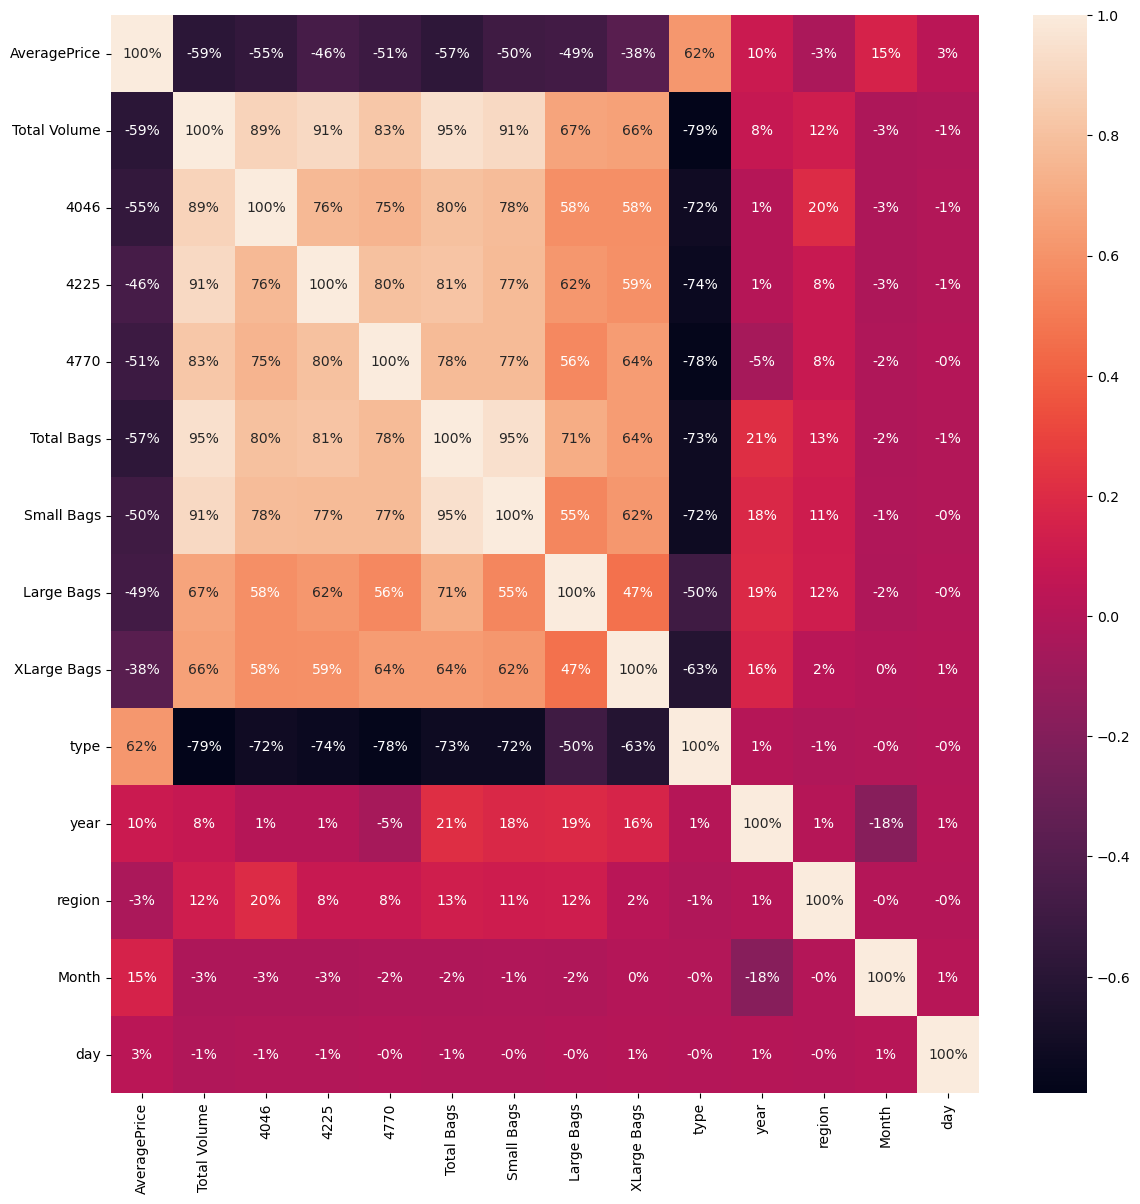

In [53]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

In [54]:
df=df1

# When Average Price is Target Variable (Label)

In [55]:
#checking the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
x=df.iloc[:,1:]
x

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0         11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1         10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2         11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3         11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4         10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      9.745419  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      9.538855  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      9.530085  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      9.693150  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      9.769418  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large Bags  XLarge Bags  type  year  region  Month  day  
0        4.545951          0.0     0  2015       0     12   27  
1        4.589955          0.0     0  2015       0     12   20  
2        4.645736          0.0     0  2015       0     12   13  
3        4.903495          0.0     0  2015       0     12    6  
4        5.291746          0.0     0  2015       0     11   29  
...           ...          ...   ...   ...     ...    ...  ...  
18244    6.070391          0.0     1  2018      53      2    4  
18245    5.786284          0.0     1  2018      53      1   28  
18246    3.768384          0.0     1  2018      53      1   21  
18247    3.931826          0.0     1  2018      53      1   14  
18248    3.296207          0.0     1  2018      53      1    7  

[17834 rows x 13 columns]

In [57]:
x.shape[1]

13

In [58]:
y=df.iloc[:,0]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17834, dtype: float64

In [59]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [60]:
vif_cal()

     VIF Values      Features
0   1339.468745  Total Volume
1     53.095951          4046
2    130.945146          4225
3     10.198947          4770
4    712.644988    Total Bags
5    272.876116    Small Bags
6     13.702966    Large Bags
7      2.768950   XLarge Bags
8      6.473311          type
9    149.357517          year
10     4.232719        region
11     4.042942         Month
12     4.189735           day


In [61]:
df.drop(['Total Volume'],axis=1,inplace=True)

In [62]:
x=df.iloc[:,1:]
x

4046       4225      4770  Total Bags  Small Bags  Large Bags  \
0      6.944801  10.905146  3.895080    9.070833    9.060055    4.545951   
1      6.515127  10.706381  4.083115    9.159737    9.149429    4.589955   
2      6.679222  11.600485  4.879007    9.005325    8.992584    4.645736   
3      7.032624  11.184108  4.298373    8.667708    8.644425    4.903495   
4      6.848515  10.688288  4.340944    8.729874    8.697389    5.291746   
...         ...        ...       ...         ...         ...         ...   
18244  7.624599   7.333154  0.000000    9.510421    9.477908    6.070391   
18245  7.083975   8.141044  0.000000    9.134090    9.098407    5.786284   
18246  7.084159   7.805389  6.591591    9.147945    9.143431    3.768384   
18247  7.332127   8.000363  6.590315    9.302969    9.298401    3.931826   
18248  7.971006   7.765200  5.418453    9.393924    9.391757    3.296207   

       XLarge Bags  type  year  region  Month  day  
0              0.0     0  2015       0     12   27  
1              0.0     0  2015       0     12   20  
2              0.0     0  2015       0     12   13  
3              0.0     0  2015       0     12    6  
4              0.0     0  2015       0     11   29  
...            ...   ...   ...     ...    ...  ...  
18244          0.0     1  2018      53      2    4  
18245          0.0     1  2018      53      1   28  
18246          0.0     1  2018      53      1   21  
18247          0.0     1  2018      53      1   14  
18248          0.0     1  2018      53      1    7  

[17834 rows x 12 columns]

In [63]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [64]:
vif_cal()

    VIF Values     Features
0    29.640522         4046
1    55.252333         4225
2    10.198932         4770
3   486.132224   Total Bags
4   271.265209   Small Bags
5    13.540342   Large Bags
6     2.763598  XLarge Bags
7     6.290130         type
8    87.595313         year
9     4.214671       region
10    4.035535        Month
11    4.188462          day


In [65]:
df.drop(['Total Bags'],axis=1,inplace=True)

In [66]:
x=df.iloc[:,1:]
x

4046       4225      4770  Small Bags  Large Bags  XLarge Bags  \
0      6.944801  10.905146  3.895080    9.060055    4.545951          0.0   
1      6.515127  10.706381  4.083115    9.149429    4.589955          0.0   
2      6.679222  11.600485  4.879007    8.992584    4.645736          0.0   
3      7.032624  11.184108  4.298373    8.644425    4.903495          0.0   
4      6.848515  10.688288  4.340944    8.697389    5.291746          0.0   
...         ...        ...       ...         ...         ...          ...   
18244  7.624599   7.333154  0.000000    9.477908    6.070391          0.0   
18245  7.083975   8.141044  0.000000    9.098407    5.786284          0.0   
18246  7.084159   7.805389  6.591591    9.143431    3.768384          0.0   
18247  7.332127   8.000363  6.590315    9.298401    3.931826          0.0   
18248  7.971006   7.765200  5.418453    9.391757    3.296207          0.0   

       type  year  region  Month  day  
0         0  2015       0     12   27  
1         0  2015       0     12   20  
2         0  2015       0     12   13  
3         0  2015       0     12    6  
4         0  2015       0     11   29  
...     ...   ...     ...    ...  ...  
18244     1  2018      53      2    4  
18245     1  2018      53      1   28  
18246     1  2018      53      1   21  
18247     1  2018      53      1   14  
18248     1  2018      53      1    7  

[17834 rows x 11 columns]

In [67]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [68]:
vif_cal()

    VIF Values     Features
0    29.492426         4046
1    53.329746         4225
2    10.176873         4770
3    64.607449   Small Bags
4     7.806734   Large Bags
5     2.752311  XLarge Bags
6     6.288208         type
7    73.121918         year
8     4.212986       region
9     4.035454        Month
10    4.187822          day


In [69]:
y.shape

(17834,)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.62742619,  0.35800125, -0.30179239, ..., -1.69078431,
         1.64836388,  1.29278384],
       [-0.75550098,  0.28688711, -0.2563869 , ..., -1.69078431,
         1.64836388,  0.49488527],
       [-0.70658843,  0.6067806 , -0.06419982, ..., -1.69078431,
         1.64836388, -0.30301329],
       ...,
       [-0.58588682, -0.75103402,  0.34934464, ...,  1.71404749,
        -1.45632855,  0.60887078],
       [-0.51197383, -0.681276  ,  0.34903636, ...,  1.71404749,
        -1.45632855, -0.18902778],
       [-0.32153998, -0.76541289,  0.06606239, ...,  1.71404749,
        -1.45632855, -0.98692634]])

In [71]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Finding best Random state
maxR2S=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score>maxR2S:
        maxR2S=r2score
        maxRS=i
print('Best accuracy is',maxR2S,'on Random_state',maxRS)



Best accuracy is 0.5259426872013487 on Random_state 62


In [72]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=62)

In [73]:
model=[LinearRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),KNeighborsRegressor(),SVR(), AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(), Lasso(alpha=.00001),Ridge(alpha=.00001),ElasticNet(alpha=.00001)]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("error:")
    print("Mean squared error:", mean_squared_error(y_test, predm))
    print("Mean absolute error:", mean_absolute_error(y_test, predm))
    print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predm)))
    print("R2 Score of ",m,"is: ",r2_score(y_test, predm))
    sc=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Cross validation score of',m,"is: ",sc.mean())
    print("Difference between r2 score and cross validation score is", r2_score(y_test, predm)-sc.mean())
    print()
    print()
    print()
    print()   



error:
Mean squared error: 0.07106649935308963
Mean absolute error: 0.20896765636312362
Root Mean squared error: 0.26658300649720645
R2 Score of  LinearRegression() is:  0.5259426872013487
Cross validation score of LinearRegression() is:  0.11681095395569507
Difference between r2 score and cross validation score is 0.40913173324565366




error:
Mean squared error: 0.03836368903008783
Mean absolute error: 0.129405718557279
Root Mean squared error: 0.1958665081888372
R2 Score of  DecisionTreeRegressor() is:  0.7440905701533493
Cross validation score of DecisionTreeRegressor() is:  -0.26877085903254244
Difference between r2 score and cross validation score is 1.0128614291858917




error:
Mean squared error: 0.04236789385161652
Mean absolute error: 0.13512988226499717
Root Mean squared error: 0.2058346274357561
R2 Score of  ExtraTreeRegressor() is:  0.7173800582403017
Cross validation score of ExtraTreeRegressor() is:  -0.38372904413946113
Difference between r2 score and cross validation

RandomForest Regressor has the highest r2 score which is 88% (this may be due to overfitting or underfitting). so we also checked the cross validation for actual accuracy. After Cross Validation, we found out that the minimum difference between the r2 score and cross validation score is .36 which is given by Gradient Boosting Regressor. Final model is Gradient Boosting Regressor which has the 74% actual accuracy (r2 score).

# HyperParameter Tunning

In [74]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
0.8987883259261442


accuracy is increased.

In [75]:
Finalmodel=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=7)
Finalmodel.fit(x_train,y_train)
pred=Finalmodel.predict(x_test)
print("R2_score:",r2_score(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9053007570037133
Mean squared error: 0.014196476901501007
Mean absolute error: 0.08685777489658363
Root Mean squared error: 0.11914896936818634


In [76]:
import pickle
filename='Avocado_AveragePrice_Regressor.pkl'
pickle.dump(Finalmodel,open(filename,'wb'))

In [77]:
loaded_model=pickle.load(open('Avocado_AveragePrice_Regressor.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.53007570037133


In [78]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0         1         2         3         4         5     \
predicted  1.031197  1.397806  1.482446  1.169429  1.416939  1.068823   
original   0.990000  1.300000  1.490000  1.190000  1.570000  1.030000   

               6         7         8         9     ...     5341      5342  \
predicted  1.239287  1.257091  1.858483  0.889192  ...  1.54056  1.027756   
original   1.240000  1.400000  1.810000  0.750000  ...  1.61000  1.030000   

               5343      5344      5345      5346     5347      5348     5349  \
predicted  1.032647  1.044632  1.233106  1.554089  1.13669  1.500633  1.79453   
original   1.050000  0.910000  1.230000  1.460000  1.18000  1.640000  1.70000   

               5350  
predicted  1.016945  
original   1.040000  

[2 rows x 5351 columns]

# When Target variable is region

In [79]:
df1.corr()

AveragePrice      4046      4225      4770  Small Bags  \
AveragePrice      1.000000 -0.551596 -0.459261 -0.507403   -0.497023   
4046             -0.551596  1.000000  0.764740  0.746330    0.780186   
4225             -0.459261  0.764740  1.000000  0.799201    0.770560   
4770             -0.507403  0.746330  0.799201  1.000000    0.769555   
Small Bags       -0.497023  0.780186  0.770560  0.769555    1.000000   
Large Bags       -0.485341  0.584306  0.618016  0.555664    0.551449   
XLarge Bags      -0.380619  0.583520  0.593321  0.639673    0.621203   
type              0.619118 -0.719482 -0.741367 -0.778274   -0.724734   
year              0.096924  0.007117  0.007601 -0.051923    0.182931   
region           -0.030929  0.200752  0.082283  0.082727    0.114967   
Month             0.153596 -0.026643 -0.026360 -0.021446   -0.013367   
day               0.029890 -0.006956 -0.008487 -0.001884   -0.002842   

              Large Bags  XLarge Bags      type      year    region     Month  \
AveragePrice   -0.485341    -0.380619  0.619118  0.096924 -0.030929  0.153596   
4046            0.584306     0.583520 -0.719482  0.007117  0.200752 -0.026643   
4225            0.618016     0.593321 -0.741367  0.007601  0.082283 -0.026360   
4770            0.555664     0.639673 -0.778274 -0.051923  0.082727 -0.021446   
Small Bags      0.551449     0.621203 -0.724734  0.182931  0.114967 -0.013367   
Large Bags      1.000000     0.466647 -0.496650  0.188466  0.123820 -0.017843   
XLarge Bags     0.466647     1.000000 -0.625329  0.164443  0.021915  0.003622   
type           -0.496650    -0.625329  1.000000  0.009091 -0.010840 -0.004957   
year            0.188466     0.164443  0.009091  1.000000  0.007607 -0.178478   
region          0.123820     0.021915 -0.010840  0.007607  1.000000 -0.001934   
Month          -0.017843     0.003622 -0.004957 -0.178478 -0.001934  1.000000   
day            -0.001298     0.006624 -0.000880  0.005801 -0.000936  0.012436   

                   day  
AveragePrice  0.029890  
4046         -0.006956  
4225         -0.008487  
4770         -0.001884  
Small Bags   -0.002842  
Large Bags   -0.001298  
XLarge Bags   0.006624  
type         -0.000880  
year          0.005801  
region       -0.000936  
Month         0.012436  
day           1.000000

<Axes: >

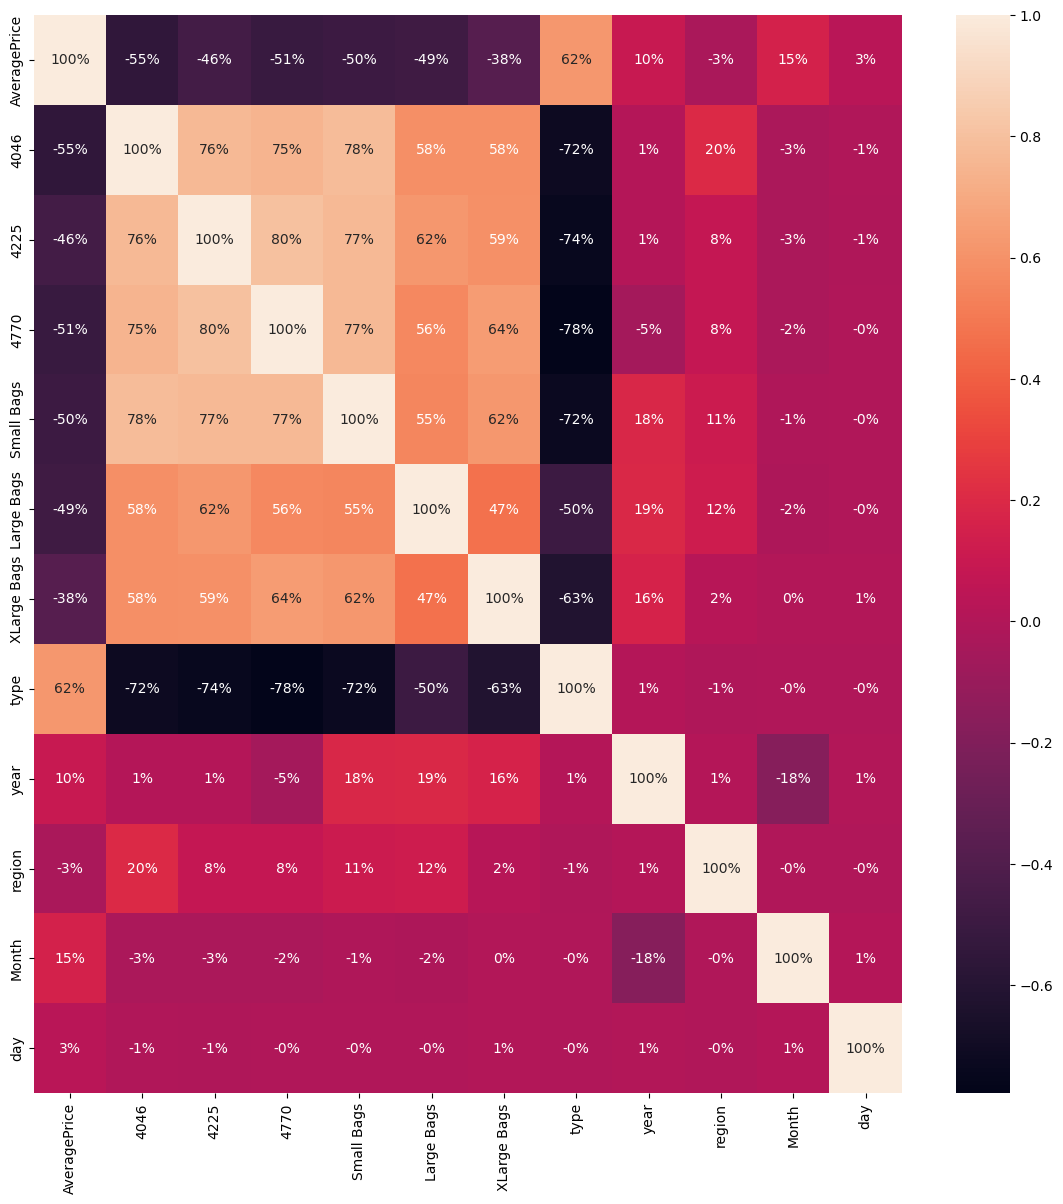

In [80]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

In [81]:
df1.drop(['AveragePrice'],axis=1,inplace=True) # because of -3% ( highest negative correlation)

In [82]:
df1.drop(['day','Month'],axis=1,inplace=True)   

In [83]:
df1.drop(['year'],axis=1,inplace=True)

In [84]:
x=df1.drop(['region'],axis=1)
x

4046       4225      4770  Small Bags  Large Bags  XLarge Bags  \
0      6.944801  10.905146  3.895080    9.060055    4.545951          0.0   
1      6.515127  10.706381  4.083115    9.149429    4.589955          0.0   
2      6.679222  11.600485  4.879007    8.992584    4.645736          0.0   
3      7.032624  11.184108  4.298373    8.644425    4.903495          0.0   
4      6.848515  10.688288  4.340944    8.697389    5.291746          0.0   
...         ...        ...       ...         ...         ...          ...   
18244  7.624599   7.333154  0.000000    9.477908    6.070391          0.0   
18245  7.083975   8.141044  0.000000    9.098407    5.786284          0.0   
18246  7.084159   7.805389  6.591591    9.143431    3.768384          0.0   
18247  7.332127   8.000363  6.590315    9.298401    3.931826          0.0   
18248  7.971006   7.765200  5.418453    9.391757    3.296207          0.0   

       type  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
18244     1  
18245     1  
18246     1  
18247     1  
18248     1  

[17834 rows x 7 columns]

In [85]:
y=df["region"]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17834, dtype: int64

In [86]:
x.shape[1]

7

In [87]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [88]:
vif_cal()

   VIF Values     Features
0   27.849739         4046
1   43.761420         4225
2    9.859187         4770
3   46.457611   Small Bags
4    7.754528   Large Bags
5    2.721425  XLarge Bags
6    3.422554         type


we are not removing the data now because these are important data.

In [89]:
y.shape

(17834,)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.62742619,  0.35800125, -0.30179239, ..., -0.6852737 ,
        -0.65510992, -0.97748783],
       [-0.75550098,  0.28688711, -0.2563869 , ..., -0.67378567,
        -0.65510992, -0.97748783],
       [-0.70658843,  0.6067806 , -0.06419982, ..., -0.65922308,
        -0.65510992, -0.97748783],
       ...,
       [-0.58588682, -0.75103402,  0.34934464, ..., -0.88827062,
        -0.65510992,  1.02303064],
       [-0.51197383, -0.681276  ,  0.34903636, ..., -0.84560133,
        -0.65510992,  1.02303064],
       [-0.32153998, -0.76541289,  0.06606239, ..., -1.01154015,
        -0.65510992,  1.02303064]])

In [91]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.7852737806017567 on Random_state 367


In [93]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=367)

In [94]:
model=[DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
   
    scr=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print()   



Accuracy of DecisionTreeClassifier() is:    0.7787329471126893
[[ 74   0   0 ...   0   0   0]
 [  0  55   0 ...   0   0   4]
 [  0   0 101 ...   0   0   2]
 ...
 [  0   0   0 ...  90   0   0]
 [  0   0   0 ...   0  84   0]
 [  0   2   0 ...   0   0  64]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       104
           1       0.67      0.59      0.63        93
           2       0.86      0.94      0.90       107
           3       0.72      0.73      0.72        91
           4       0.86      0.83      0.85       112
           5       0.71      0.64      0.67       114
           6       0.97      0.93      0.95        99
           7       0.89      0.77      0.83       101
           8       0.88      0.95      0.91       106
           9       0.68      0.81      0.74        90
          10       0.68      0.65      0.67       110
          11       0.89      0.89      0.89        98
          12       0.89      0.83      0.8

KNeighborsClassifier has the highest accuracy which is 83% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is .14 which is given by SVC(). Final model is SVC which has the 74% actual accuracy (accuracy score).

# HyperParameter Tunning

In [95]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear']}

grid_search= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   3.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   3.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   3.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=   3.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   3.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.513 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.508 total time=   1.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.520 total time=   1.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.508 total time=   1.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.527 total time=   1.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.370 total time=   4.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

accuracy is increased

In [96]:
FinalModel=SVC(C=100,gamma=1,kernel='rbf')
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8645113062978882


In [97]:
import pickle
filename='Avocado_Region_classification.pkl'
pickle.dump(FinalModel,open(filename,'wb'))

In [98]:
import pickle
loaded_model=pickle.load(open('Avocado_Region_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.45113062978882


In [99]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
predicted    33    13     8    29     9    19    31    32    30    17  ...   
original     33    13     8    29     9    19    31    32    30    17  ...   

           5341  5342  5343  5344  5345  5346  5347  5348  5349  5350  
predicted    33    26     1     0    36     8    51     6     6    19  
original     33    26     1     5    36     8    51     6     6    19  

[2 rows x 5351 columns]